# Setup

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import sys, os
sys.path.append(os.path.abspath('../'))
del sys, os

In [3]:
from database_creation.database import Database
from database_creation.article import Article
from database_creation.sentence import Sentence
from database_creation.coreference import Coreference
from database_creation.np import Np
from database_creation.token import Token
from database_creation.utils import BaseClass

# Processing the database

## Preprocessing

### Initializing the database

In [4]:
database = Database(max_size=10000, threshold=3, project_root='../')


Initializing the database...

Cleaning the database...
Initial length of articles: 10000
Criterion: Check if an article's data is complete, ie if its annotation file exists.
Final length of articles: 6514
Done (elapsed time: 1s).

Done (elapsed time: 1s).



### Preprocessing the database

In [5]:
database.preprocess_database()


Preprocessing the database...

Computing the articles' metadata...
  article 1000/6514...
  article 2000/6514...
  article 3000/6514...
  article 4000/6514...
  article 5000/6514...
  article 6000/6514...
Done (elapsed time: 3s).


Computing the entity tuples...
  article 1000/6514...
  article 2000/6514...
  article 3000/6514...
  article 4000/6514...
  article 5000/6514...
  article 6000/6514...
Done (elapsed time: 22s).


Cleaning the database...
Initial length of articles: 6514
Criterion: Check if an article does not belong to the tuples ids.
Final length of articles: 4353
Done (elapsed time: 0s).

Done (elapsed time: 25s).




Computing and displaying statistics...

Total number of tuples: 35466

10 most frequent tuples:
George Bush|John Mccain (in 108 articles)
Al Gore|Bill Bradley (in 84 articles)
St Louis Rams|Tennessee Titans (in 53 articles)
New York City|New York State (in 45 articles)
Chechnya|Russia (in 44 articles)
George Bush|Steve Forbes (in 36 articles)
Hillary Clinton|Rudolph Giuliani (in 33 articles)
Israel|Syria (in 31 articles)
Bill Bradley|John Mccain (in 31 articles)
Al Gore|George Bush (in 30 articles)

Done (elapsed time: 0s).



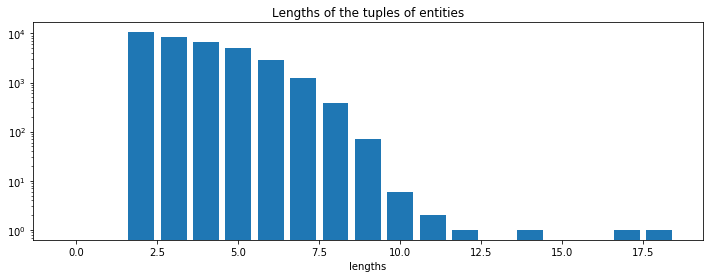

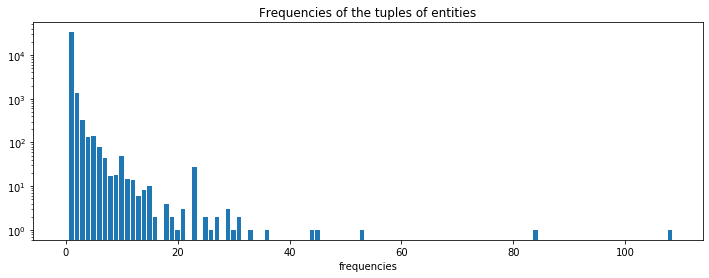

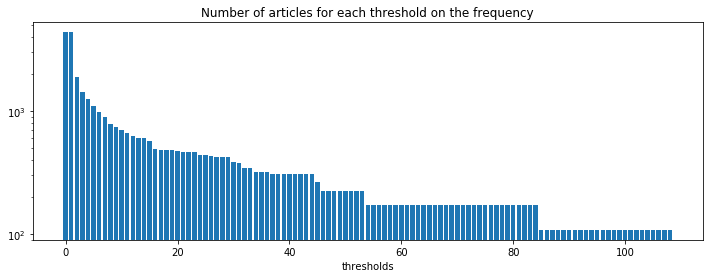

In [6]:
database.process_stats(type_='tuples')

In [7]:
database.filter_threshold()


Filtering the articles according to a threshold...
Initial length of tuples: 35466

Cleaning the database...
Initial length of articles: 4353
Criterion: Check if an article does not belong to the tuples ids.
Final length of articles: 1425
Done (elapsed time: 0s).

Final length of tuples: 911
Done (elapsed time: 0s).



## Processing the database

### Computing the contexts of the articles

In [8]:
database.preprocess_articles()


Preprocessing the articles...

Computing the articles' annotations...
  article 1000/1425...
Done (elapsed time: 177s).

Done (elapsed time: 177s).



In [9]:
database.process_contexts()


Processing the articles contexts...

Computing the contexts...
  tuple 100/911...
  tuple 200/911...
  tuple 300/911...
  tuple 400/911...
  tuple 500/911...
  tuple 600/911...
  tuple 700/911...
  tuple 800/911...
  tuple 900/911...
Done (elapsed time: 0s).

Done (elapsed time: 0s).




Computing and displaying statistics...
Done (elapsed time: 0s).



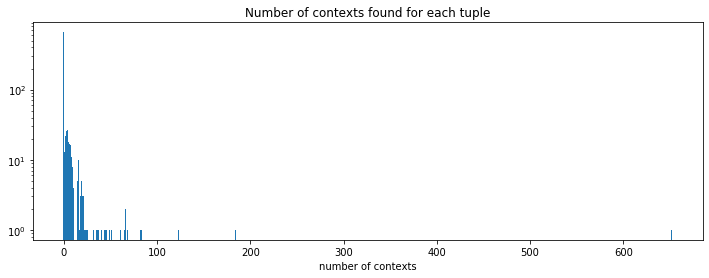

In [10]:
database.process_stats(type_='contexts')

### Computing the wikipedia information

In [ ]:
database.process_wikipedia(load=False)


Processing the wikipedia information...

Computing the wikipedia information...
Ambiguous case, first one chosen: Bush, George (Former Pres)|Bush, George W (Gov)
Ambiguous case, first one chosen: Mccain, John S (Sen)|Mccain, John (Sen)
  tuple 100/911...
Ambiguous case, first one chosen: Giunta, John C|Giunta, John N
Ambiguous case, first one chosen: Putin, Vladimir V (Prime Min)|Putin, Vladimir V (Pres)
  tuple 200/911...


In [ ]:
database.process_stats(type_='wikipedia')

### Computing the aggregation samples

In [ ]:
database.process_task(load=False)

## Results

### Load existing samples

In [ ]:
database = Database(max_size=10000, threshold=3, project_root='../')

database.preprocess_database()
database.filter_threshold()

database.process_wikipedia(load=True)
database.process_task(load=True)

### Visualize the results

In [27]:
for sample in database.samples:
    print(Database.to_string(sample))
    print(Database.to_string(database.samples[sample]))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




88_1169192_38|39
Entities: Alan Keyes|George Bush
Alan Keyes: Alan Lee Keyes (born August 7, 1950) is an American  conservative political activist, pundit, author and former ambassador.
A doctoral graduate of Harvard University, Keyes began his diplomatic career in the U.S. Foreign Service in 1979 at the United States consulate in Bombay, India, and later in the American embassy in Zimbabwe.
Keyes was appointed Ambassador to the Economic and Social Council of the United Nations by President Ronald Reagan, and served as Reagan's Assistant Secretary of State for International Organization Affairs from 1985 to 1987; in his capacities as a UN ambassador, among Keyes's accomplishments was contributing to the Mexico City Policy.
Keyes ran for President of the United States in 1996, 2000, and 2008. He was the Republican nominee for the U.S. Senate in Maryland against Paul Sarbanes in 1988 and Barbara Mikulski in 1992, as well as in Illinois against Barack Obama in 2004. Keyes lost all three 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [18]:
database.display_tuple(0)

Entity tuples: George Bush|John Mccain




KeyError: ('George Bush', 'John Mccain')

In [19]:
database.display_tuple(1)

Entity tuples: Elian Gonzalez|Juan Gonzalez




KeyError: ('Elian Gonzalez', 'Juan Gonzalez')

In [ ]:
database.display_tuple(2)

In [ ]:
database.display_tuple(3)

In [ ]:
database.display_tuple(4)

In [ ]:
database.display_tuple(5)

In [ ]:
database.display_tuple(6)

In [ ]:
def display_tuple(self, idx):

    entity_tuple = self.tuples[idx]['tuple_']
    ids = self.tuples[idx]['ids']

    length = 0

    print("Entity tuples: {}\n\n".format(self.to_string(entity_tuple)))

    for id_ in ids:
        article = self.articles[id_]

        for type_ in article.contexts:
            contexts = article.contexts[type_][entity_tuple]
            length += len(contexts)

            print(self.to_string(contexts) + '\n\n')

    print("\n{} samples out of {} articles".format(length, len(ids)))